# Mathematical Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading Data
data=pd.read_csv('hdata.csv')
print(data.shape)
data.head()

(9, 3)


,Rooms,Sqfeet,Price
0,1,100,945
1,2,134,1500
2,2,150,1795
3,3,200,1890
4,6,600,5700


In [3]:
#collecting x and y
x=data['Sqfeet'].values
y=data['Price'].values
print(x)
print(y)

[100 134 150 200 600  78 398 240 450]
[ 945 1500 1795 1890 5700  900 3880 2400 4550]


In [4]:
#Mean x and y
mean_x=np.mean(x)
mean_y=np.mean(y)

In [5]:
mean_x

261.11111111111109

In [6]:
mean_y

2617.7777777777778

In [7]:
#total number of values
n=len(x)
#using formula calculate
numerator=0
denominator=0

In [8]:
for i in range(n):
    numerator+=(x[i]-mean_x)*(y[i]-mean_y)
    denominator+=(x[i]-mean_x)**2
m=numerator/denominator
c=mean_y-(m*mean_x)

In [9]:
print(m,c)

9.36726910157 171.879734591


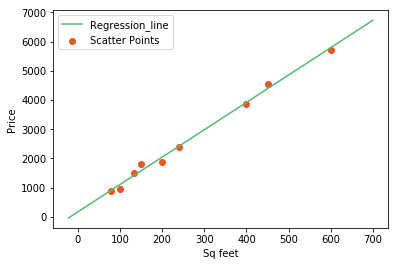

In [10]:
max_x=np.max(x)+100
min_x=np.min(x)-100

X=np.linspace(min_x,max_x,10)
Y=c+m*X
#x=np.linspace(x,10)
plt.plot(X,Y,c='#58b970',label="Regression_line")
plt.scatter(x,y,c='#ef5423',label="Scatter Points")

plt.xlabel('Sq feet')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
numerator1=0
denominator1=0
for i in range(n):
    y_pred=c+m*X[i]
    numerator1+=(y[i]-mean_y)**2
    denominator1+=(y[i]-y_pred)**2
r2=(numerator1/denominator1)
print(r2)

0.836850189685


# Using Scikit Learn

In [12]:
from sklearn import linear_model
import numpy as np

In [13]:
data=pd.read_csv('hdata.csv')
x=data[['Sqfeet']].values
y=data['Price'].values

In [14]:
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
x1=np.array([[340],[310]])
y1=np.array([3400,3100])
predictions = lm.predict(x1)
print(predictions)
print(y1)

[ 3356.75122912  3075.73315608]
[3400 3100]


In [16]:
lm.score(x1,y1)

0.94534809119284002

# Example 2

In [17]:
from sklearn import linear_model
import numpy as np

In [18]:
x = np.array([[1,100],[2,134],[2,150],[3,200],[6,600],[1,78],[4,398],[3,240],[5,450]])
y = np.array([1000,1340,1500,2000,6000,780,3980,2400,4500])

In [19]:
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
x1=np.array([[3,340],[4,310]])#room number and sq feet respectively
y1=np.array([3400,3100])#price of room
predictions = lm.predict(x1)
print(predictions)
print(y1)

[ 3400.  3100.]
[3400 3100]


In [21]:
lm.score(x1,y1)

1.0

# Example 3

In [22]:
from sklearn import linear_model
from sklearn import datasets
data = datasets.load_boston() ##loads Boston dataset from datasets library


In [23]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [25]:
import pandas as pd
# define the data/predictors as the pre-set feature names
df = pd.DataFrame(data.data, columns=data.feature_names)

#Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target,columns=["MEDV"])

In [26]:
print(df.tail())
print(target.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  
     MEDV
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9


In [27]:
x = df
y = target

In [28]:
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predictions = lm.predict(x[0:5])
print(predictions)
print(y[0:5])

[[ 30.00821269]
 [ 25.0298606 ]
 [ 30.5702317 ]
 [ 28.60814055]
 [ 27.94288232]]
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [30]:
lm.score(x,y)

0.7406077428649428